In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable 
pd.options.display.max_columns=None

## Preguntas propuestas

* Estudio de mercado: Las personas que trabajan de estos puestos: tamaño empresa, industria... 
* Machine learning: Cuánto invierten realmente en *Machine Learning*.

In [2]:
def quitar_espacios(elemento):
    '''
    Esta función recoge elemento a elemento de una columna, quita los espacios de los lados y
    devuelve el string modificado'''
    try:
        return elemento.strip()
    except:
        return np.nan

In [3]:
def explode_strip(dataframe,columna):
    ''' 
    Esta función recoge el dataframe y la columna a modificar. Hace un explode de esa columna y quita los espacios de cada elemento.
    Devuelve el dataframe modificado.'''
    dataframe2 = dataframe.explode(columna)
    dataframe2[columna] = dataframe2[columna].apply(quitar_espacios)
    return dataframe2

In [4]:
def grafica(dataframe,columna,nombre,lista_nombres):
    df_grafica = explode_strip(dataframe,columna)
    plt.figure(figsize= (3,8))
    fig = sns.barplot(y = df_grafica[columna].value_counts().index, x = df_grafica[columna].value_counts(), data = df_grafica, palette = 'pastel')
    fig.set_ylabel('', fontweight = "bold", fontsize = 11)
    fig.set_xlabel('', fontweight = "bold", fontsize = 11)

    fig.set_title(nombre, fontweight = "bold", fontsize = 12)
    fig.set_yticklabels(lista_nombres)
    fig.spines['top'].set_visible(False)
    fig.spines['right'].set_visible(False);

In [5]:
def saber_unicos(dataframe,columna):
    df_grafica = explode_strip(dataframe,columna)
    valores_unicos = df_grafica[columna].value_counts().index
    return valores_unicos

In [6]:
df = pd.read_pickle('archivos_resultantes/dataframe_graficas.pkl')
df.sample(1)

,id_survey,time,age,gender,country,studies,position,years_programming,preferred_language,computing_platform,times_use_tpu,years_use_ml,industry,company_size,da_employees,company_ml,year_salary,investment_ml,main_bd,main_bi,main_da,duties,best_cloud_services,regular_automl_a,data_storage_products_b
730,730,999,30-34,Man,Germany,Master’s degree,Data Analyst,Junior,Python,A laptop,Never,Not use,Broadcasting/Communications,Small,5-9,Recently started,"30,000-39,999","1000-9,999",SQLite,unknown,Business intelligence software,Analyze and understand data to influence produ...,unknown,unknown,unknown


In [7]:
df_explode = pd.read_pickle('archivos_resultantes/dataframe_graficas_explode.pkl')
df_explode.head(1)

,id_survey,programming_languages,ide,hardware,visualization,ml_tools,ml_algorithm,bd_a,bi,notebooks,computer_vision,nlp,cloud_platforms_a,cloud_product_a,data_storage_products_a,ml_products_a,automated_ml_tools_a,ml_experiments_a,sharing,courses,media,cloud_platforms_b,cloud_products_b,ml_products_b,bd_b,bi_b,automated_ml_tools_b,regular_automl_b,ml_experiments_b
16,16,"[Python, SQL]","[Jupyter , Jupyter Notebook]",[None],"[Matplotlib , Seaborn , Plotly / Plotly Express]",[Scikit-learn],[Linear or Logistic Regression],[unknown],[unknown],"[Kaggle Notebooks, Colab Notebooks, Databrick...",[unknown],[unknown],[unknown],[unknown],[unknown],[unknown],[unknown],[unknown],[unknown],"[Coursera, Kaggle Learn Courses, Cloud-certifi...","[Kaggle , Blogs]",[IBM Cloud / Red Hat],[unknown],[Databricks],[Microsoft Azure SQL Database],"[Microsoft Power BI, Google Data Studio, Table...","[Automated data augmentation , Automated featu...","[Google Cloud AutoML , H2O Driverless AI , ...","[Neptune.ai , Weights & Biases , Comet.ml , ..."


### Gráfico brecha de género. 

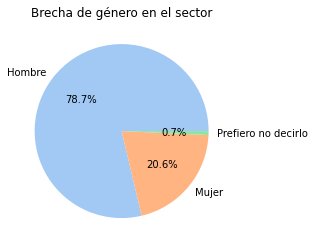

In [8]:
colors = sns.color_palette('pastel')[0:3]

fig = plt.pie(df['gender'].value_counts()[:3],labels= ['Hombre','Mujer','Prefiero no decirlo'],autopct='%1.1f%%',  colors = colors);
plt.title('Brecha de género en el sector');

Como se puede observar en este *pie chart* y en base a la encuesta realizada, hay una enorme brecha de género en el sector, ya que casi el 80% de los encuestados se identifican como hombres, mientras que apenas el 20% se identifican como mujeres, y hay un porcentaje minúsculo de personas que se identifican como no binarias. Por tanto, la misión que tiene Adalab, cuyo objetivo es reducir la brecha de género en este sector, está muy bien encaminada, ya que esta brecha está todavía muy latente. **!!**

### Años programando por género

In [9]:
df.stb.freq(['years_programming','gender'])

,years_programming,gender,count,percent,cumulative_count,cumulative_percent
0,Junior,Man,234,42.010772,234,42.010772
1,Architect,Man,76,13.644524,310,55.655296
2,Mid-level,Man,68,12.208259,378,67.863555
3,Junior,Woman,65,11.669659,443,79.533214
4,Senior,Man,40,7.181329,483,86.714542
5,No code,Man,18,3.231598,501,89.946140
6,Mid-level,Woman,15,2.692998,516,92.639138
7,Architect,Woman,13,2.333932,529,94.973070
8,Senior,Woman,12,2.154399,541,97.127469
9,No code,Woman,9,1.615799,550,98.743268


In [10]:
lista_años_programando = ['No code','Junior','Mid-level','Senior','Architect']

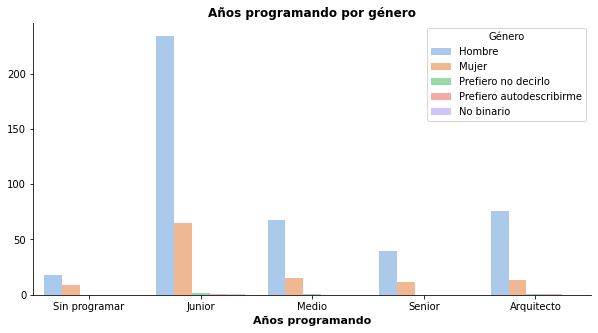

In [11]:
plt.figure(figsize= (10,5))
fig = sns.countplot(x='years_programming',hue='gender',data=df,order=lista_años_programando,palette='pastel')
fig.set_xlabel('Años programando', fontweight = "bold", fontsize = 11)
fig.set_ylabel('', fontweight = "bold", fontsize = 11)

fig.set_title('Años programando por género', fontweight = "bold", fontsize = 12)
plt.legend(title='Género',labels=['Hombre','Mujer','Prefiero no decirlo','Prefiero autodescribirme','No binario'])
fig.set_xticklabels(['Sin programar','Junior','Medio','Senior','Arquitecto'])
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False);

En este gráfico se puede observar que la mayoría de personas encuestadas, aparte de identificarse como hombres, tienen una experiencia junior dentro del sector, es decir, llevan programando entre 0 y 3 años. Esto podría indicar que es un sector relativamente joven, y que está empezando a coger especial fuerza en estos momentos. Por tanto, parece que la apuesta de Adalab por formar a futuras *Data Analyst* es apropiada. **!!**

### Lenguajes de programación favoritos

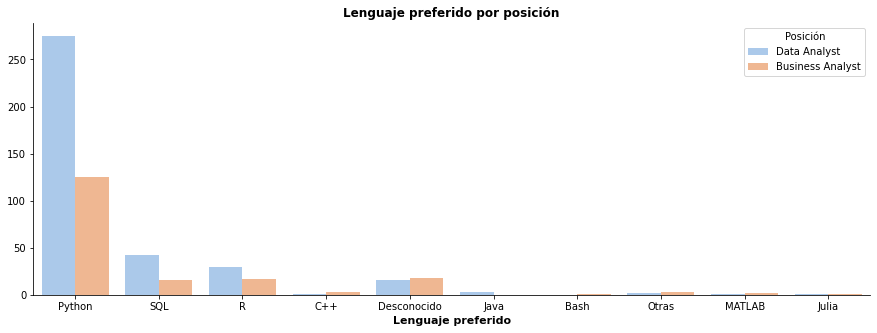

In [12]:
plt.figure(figsize= (15,5))
fig = sns.countplot(x='preferred_language',hue='position',data=df,palette='pastel')
fig.set_xlabel('Lenguaje preferido', fontweight = "bold", fontsize = 11)
fig.set_ylabel('', fontweight = "bold", fontsize = 11)

fig.set_title('Lenguaje preferido por posición', fontweight = "bold", fontsize = 12)

plt.legend(title='Posición')

fig.set_xticklabels(['Python', 'SQL', 'R', 'C++', 'Desconocido', 'Java', 'Bash', 'Otras','MATLAB', 'Julia'])

fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False);

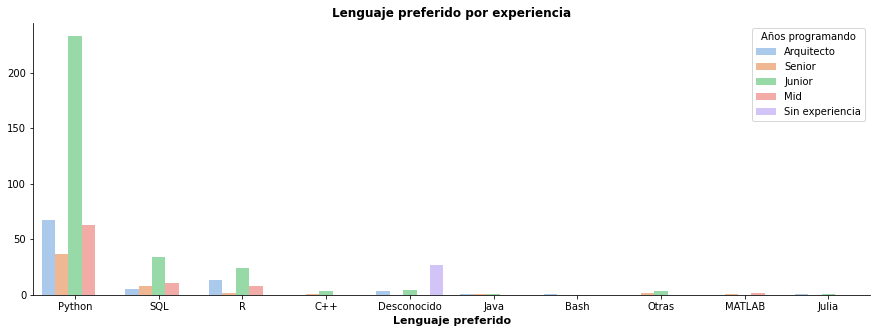

In [13]:
plt.figure(figsize= (15,5))
fig = sns.countplot(x='preferred_language',hue='years_programming',data=df,palette='pastel')
fig.set_xlabel('Lenguaje preferido', fontweight = "bold", fontsize = 11)
fig.set_ylabel('', fontweight = "bold", fontsize = 11)

fig.set_title('Lenguaje preferido por experiencia', fontweight = "bold", fontsize = 12)

plt.legend(title='Experiencia programando')
plt.legend(title='Años programando',labels=['Arquitecto','Senior','Junior','Mid','Sin experiencia'])

fig.set_xticklabels(['Python', 'SQL', 'R', 'C++', 'Desconocido', 'Java', 'Bash', 'Otras','MATLAB', 'Julia'])

fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False);

Esta gráficas muestra que los lenguajes de programación preferidos por los *Data Analyst* y *Business Analyst* son Python y SQL. Por tanto, Adalab está ofreciendo a sus alumnas y futuras alumnas lo que ahora mismo se está empleando más en el sector, ya que son los dos lenguajes de programación que está enseñando. Deberían observar el posible crecimiento del lenguaje R, ya que se puede apreciar que hay juniors que tienen este lenguaje como preferido, aunque Python sigue siendo el favorito de la mayoría de personas que entran en este rango de experiencia. 

### Salarios

In [14]:
salarios = ['unknown', '0-999', '1,000-1,999', '2,000-2,999', '3,000-3,999', '4,000-4,999',
    '5,000-7,499', '7,500-9,999', '10,000-14,999', '15,000-19,999',
    '20,000-24,999', '25,000-29,999', '30,000-39,999', '40,000-49,999',
    '50,000-59,999', '60,000-69,999', '70,000-79,999', '80,000-89,999',
    '90,000-99,999', '100,000-124,999', '125,000-149,999', '150,000-199,999',
    '200,000-249,999', '250,000-299,999', '>1,000,000']

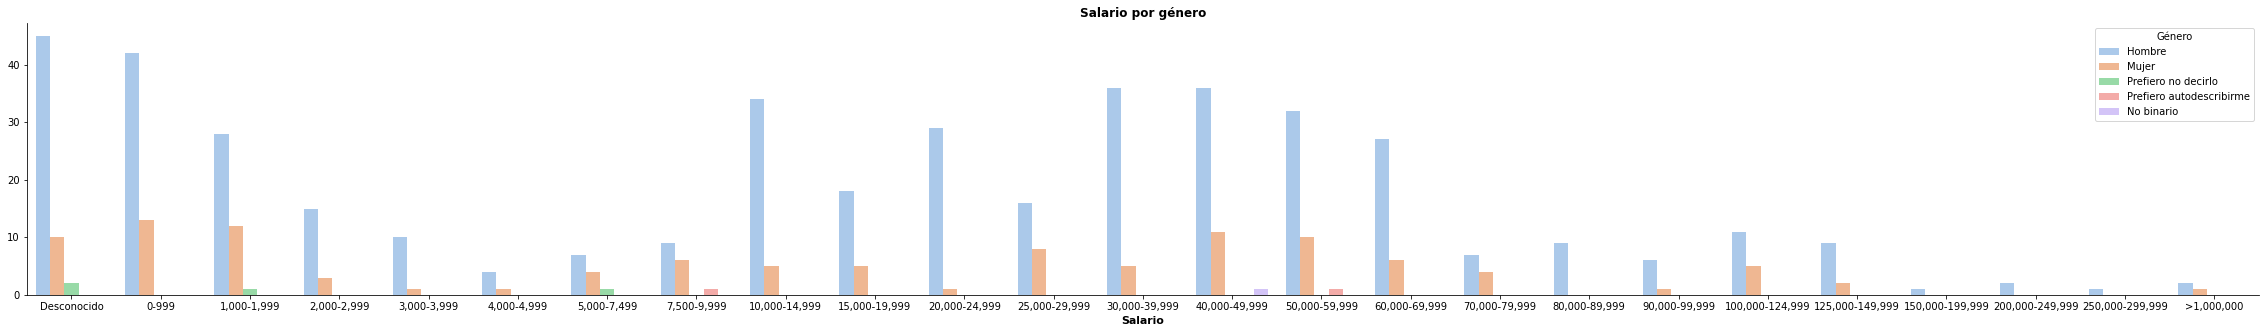

In [15]:
plt.figure(figsize= (40,5))
fig = sns.countplot(x='year_salary', hue='gender', data=df,order=salarios,palette = 'pastel')
fig.set_xlabel('Salario', fontweight = "bold", fontsize = 11)
fig.set_ylabel('', fontweight = "bold", fontsize = 11)

fig.set_title('Salario por género', fontweight = "bold", fontsize = 12)

plt.legend(title='Género',labels=['Hombre','Mujer','Prefiero no decirlo','Prefiero autodescribirme','No binario'])

fig.set_xticklabels(['Desconocido', '0-999', '1,000-1,999', '2,000-2,999', '3,000-3,999', '4,000-4,999',
    '5,000-7,499', '7,500-9,999', '10,000-14,999', '15,000-19,999',
    '20,000-24,999', '25,000-29,999', '30,000-39,999', '40,000-49,999',
    '50,000-59,999', '60,000-69,999', '70,000-79,999', '80,000-89,999',
    '90,000-99,999', '100,000-124,999', '125,000-149,999', '150,000-199,999',
    '200,000-249,999', '250,000-299,999', '>1,000,000'])
    
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False);

Este gráfico muestra que el salario medio **en Europa** en el sector parece estar entre los 10,000 y los 60,000$ anuales. Hay salarios anules muy bajos, que podrían corresponder a salarios de prácticas o becarios, aunque también podría corresponderse a una equivocación del encuestado al considerar que se le preguntaba por salario mensual en vez de anual. Además, también hay salarios muy altos, entre los 150,000 y más de un millón, aunque es un porcentaje muy pequeño de personas. **Next steps: Podría hacerse un estudio de salario en base a país, ya que no es lo msimo cobrar 40,000 en España, en Bulgaria o en Alemania**. Como dato, el salario medio de la UE se encuentra en 2,194€ mensuales en 2022, pero varía mucho por países, ya que el mínimo es Bulgaria, con 650€ mensuales, y el máximo es el de Luxemburgo, con 3,713€ al mes. [Fuente](https://www.ondacero.es/noticias/economia/salario-medio-espana-20-menor-media-union-europea_2023082164e39e709598e30001ce8e5a.html).No parece que haya una diferencia significativa en el salario entre hombres y mujeres, ya que parece las curvas tienen más o menos la misma tendencia en ambos géneros. 

### Años programando

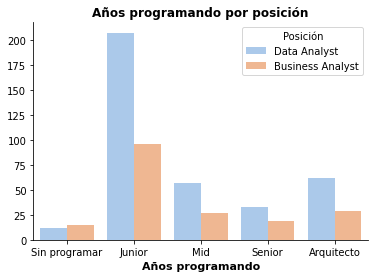

In [16]:
fig = sns.countplot(x='years_programming',hue='position',data=df,order=lista_años_programando,palette = 'pastel')
fig.set_xlabel('Años programando', fontweight = "bold", fontsize = 11)
fig.set_ylabel('', fontweight = "bold", fontsize = 11)

fig.set_title('Años programando por posición', fontweight = "bold", fontsize = 12)

plt.legend(title='Posición')
fig.set_xticklabels(['Sin programar','Junior','Mid','Senior','Arquitecto'])

fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False);

Este gráfico muestra los años programando por puesto de *Data Analyst* y de *Business Analyst*. De nuevo, se puede ver que es un sector relativamente joven y que está empezando a coger ahora mucha fuerza ya que la mayoría de encuestados llevan programando menos de tres años. En este caso, hemos dividido por posición para saber si ambos puestos son igual de jóvenes, y en proporción sí que parece que ambos puestos siguen la misma tendencia.  

### Estudios

In [17]:
lista_estudios = ['Master’s degree','Bachelor’s degree','Doctoral degree','University study, no bachelor','High school','Not answer','Professional doctorate']

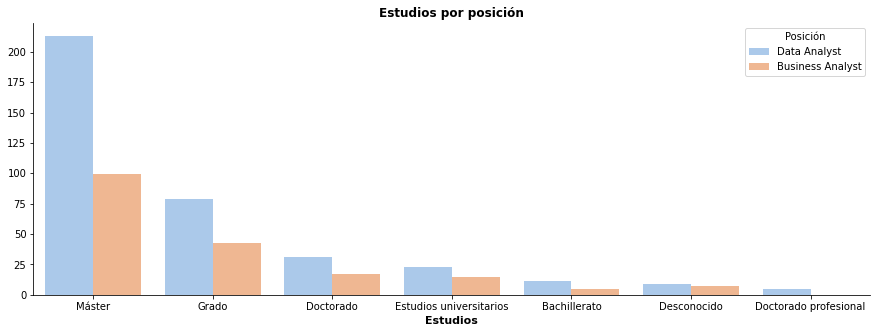

In [18]:
plt.figure(figsize= (15,5))
fig = sns.countplot(x='studies',hue='position',data=df,order=lista_estudios,palette = 'pastel')
fig.set_xlabel('Estudios', fontweight = "bold", fontsize = 11)
fig.set_ylabel('', fontweight = "bold", fontsize = 11)

fig.set_title('Estudios por posición', fontweight = "bold", fontsize = 12)
plt.legend(title='Posición')
fig.set_xticklabels(['Máster','Grado','Doctorado','Estudios universitarios','Bachillerato','Desconocido','Doctorado profesional'])

fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False);

En este gráfico se puede ver que la mayoría de personas en el sector han alcanzado un nivel de estudios de Máster o similar, seguido del grado universitario. **Next steps: Sería interesante ver si los estudios de máster y/o grado están relacionados con este sector o si, por el contrario, no están relacionados y estas personas han reiventado su carrera profesional. Esto serviría para que Adalab pudiera centrar su marketing en la reinvención laboral, como ya lo está haciendo, o si, por el contrario, debería cambiar de estrategia**. 

### Edad por género

In [19]:
lista_años = ['18-21','22-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-69']

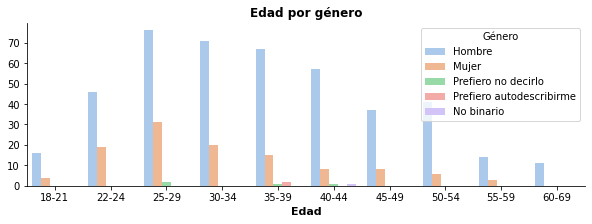

In [20]:
plt.figure(figsize= (10,3))
fig = sns.countplot(x='age',hue='gender',data=df,order=lista_años,palette = 'pastel')
fig.set_xlabel('Edad', fontweight = "bold", fontsize = 11)
fig.set_ylabel('', fontweight = "bold", fontsize = 11)

fig.set_title('Edad por género', fontweight = "bold", fontsize = 12)
plt.legend(title='Género',labels=['Hombre','Mujer','Prefiero no decirlo','Prefiero autodescribirme','No binario'])

fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False);

En este gráfico se puede observar la edad de los trabajadores del sector por género. Este gráfico permite ver, de nuevo, que el sector es un sector joven, ya que el grueso de los encuestados se encuentra entre los 25 y los 45 años. Además, es interesante que se mantenga una tendencia similar en edad entre hombres y mujeres, lo que permite sacar la conclusión de que, en este sector, las mujeres no se ven obligadas a abandonar su puesto de trabajo para dedicarse a tareas correspondientes a los cuidados, como el cuidado de los hijos. Esto es una realidad, ya que hemos realizado un breve estudio de ofertas actual en el que se puede ver que este sector ofrece buenas oportunidades de conciliación laboral, como el teletrabjo o el trabajo híbrido, o ayudas para el cuidado de los hijos. [Oferta de trabajo 1](https://www.getmanfred.com/ofertas-empleo/1451/abanca-cto-head-of-it-mar23) **!!!**



In [21]:
df.stb.freq(['age','gender'])

,age,gender,count,percent,cumulative_count,cumulative_percent
0,25-29,Man,76,13.644524,76,13.644524
1,30-34,Man,71,12.746858,147,26.391382
2,35-39,Man,67,12.028725,214,38.420108
3,40-44,Man,57,10.233393,271,48.653501
4,22-24,Man,46,8.258528,317,56.912029
5,50-54,Man,41,7.360862,358,64.272890
6,45-49,Man,37,6.642729,395,70.915619
7,25-29,Woman,31,5.565530,426,76.481149
8,30-34,Woman,20,3.590664,446,80.071813
9,22-24,Woman,19,3.411131,465,83.482944


### Herramientas

In [22]:
saber_unicos(df_explode,'programming_languages')

Index(['Python', 'SQL', 'R', 'Other', 'Javascript', 'Java', 'C++', 'Bash',
       'unknown', 'MATLAB', 'C', 'None', 'Julia', 'Swift'],
      dtype='object', name='programming_languages')

In [23]:
lista = ['Python', 'SQL', 'R', 'Otras', 'Javascript', 'Java', 'C++', 'Bash','Desconocido', 'MATLAB', 'C', 'None', 'Julia', 'Swift']

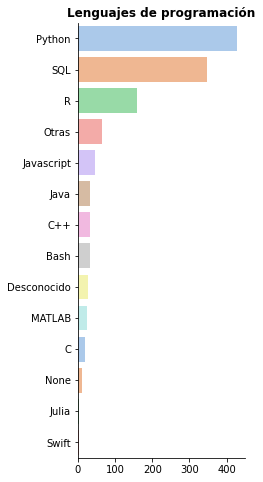

In [24]:
grafica(df_explode,'programming_languages','Lenguajes de programación', lista)

En esta gráfica, se ve que Python y SQL son los lenguajes más empleados en el sector, lo que corresponde con la gráfica anterior que muestra que Python y SQL son los lenguajes de programación favoritos. Por tanto, reiteramos que Adalab está ofreciendo a sus alumnas los conocimientos que se están empleando actualmente en este mercado. **!!!**


### ide

In [25]:
saber_unicos(df_explode,'ide')

Index(['Jupyter Notebook', 'PyCharm', 'RStudio', 'Visual Studio Code',
       'Jupyter', 'Notepad++', 'Spyder', 'Visual Studio', 'Sublime Text',
       'Other', 'unknown', 'Vim / Emacs', 'MATLAB', 'None'],
      dtype='object', name='ide')

In [26]:
lista = ['Jupyter Notebook', 'PyCharm', 'RStudio', 'Visual Studio Code','Jupyter', 'Notepad++', 'Spyder', 'Visual Studio', 'Sublime Text','Otras', 'Desconocido', 'Vim / Emacs', 'MATLAB', 'Ninguna']

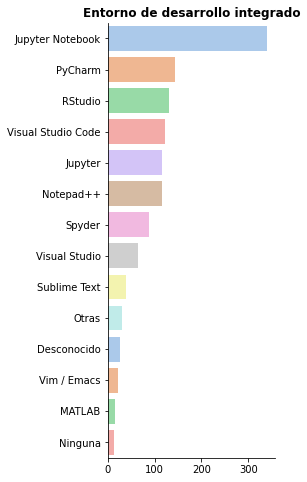

In [27]:
grafica(df_explode,'ide','Entorno de desarrollo integrado',lista)

En este gráfica se puede observar que la herramienta de EDA más empleada es Jupyter Notebook, la cual es la más empleada en el bootcamp de Data Analytics de Adalab. Además, Visual Studio Code se encuentra entre las cuatro más empleadas, y es una herramienta que también se enseña en el bootcamp. No obstante, hay dos herramientas, PyCharm y RStudio, que no se enseñan, y quizá habría que ver su tendencia por si fuera necesario comenzar a enseñarla en función de lo que pide el mercado actual, aunque tiene sentido que no nos enseñen PyCharm porque es de pago.**!!!**

### Visualización

In [28]:
saber_unicos(df_explode,'visualization')

Index(['Matplotlib', 'Seaborn', 'Plotly / Plotly Express', 'Ggplot / ggplot2',
       'None', 'Shiny', 'unknown', 'Geoplotlib', 'Bokeh', 'Other', 'D3 js',
       'Leaflet / Folium', 'Altair'],
      dtype='object', name='visualization')

In [29]:
lista = ['Matplotlib', 'Seaborn', 'Plotly / Plotly Express', 'Ggplot / ggplot2',
       'Ninguna', 'Shiny', 'unknown', 'Geoplotlib', 'Bokeh', 'Otras', 'D3 js',
       'Leaflet / Folium', 'Altair']

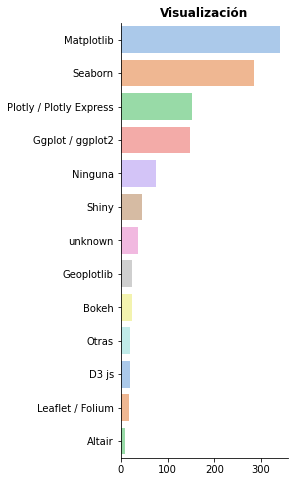

In [30]:
grafica(df_explode,'visualization','Visualización',lista)

Las librerías de visualización más empleadas en el sector actualmente son Matplotlib y Seaborn. Por tanto, Adalab sí que está al día con las tendencias actuales. Por si acaso, se recomienda estar pendiente por si acaso otras librerías que también tienen popularidad, como Plotly y Ggplot, empezaran a tener más relevancia en el mercado. **!!!**

### Productos de machine learning

In [31]:
saber_unicos(df_explode,'ml_products_a')

Index(['unknown', 'No / None', 'Azure Machine Learning Studio', 'Databricks',
       'Amazon SageMaker', 'Alteryx', 'DataRobot', 'Dataiku', 'Rapidminer',
       'Other', 'Google Cloud Vertex AI'],
      dtype='object', name='ml_products_a')

In [32]:
lista =['Desconocido', 'No / Ninguno', 'Azure Machine Learning Studio', 'Databricks',
       'Amazon SageMaker', 'Alteryx', 'DataRobot', 'Dataiku', 'Rapidminer',
       'Otras', 'Google Cloud Vertex AI']

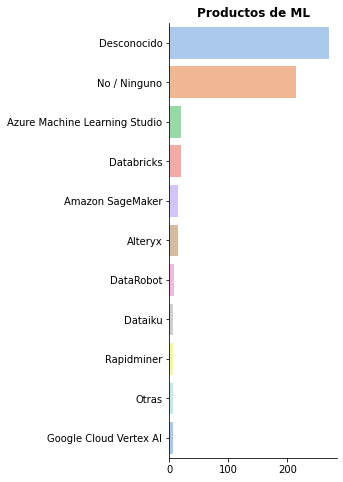

In [33]:
grafica(df_explode,'ml_products_a','Productos de ML',lista)

Se puede observar que, por lo general, las personas que ocupan estos puestos no utilizan productos de Machine Learning, por lo que no es necesario incluirlo en su formación. 

### Herramientas de machine learning

In [34]:
saber_unicos(df_explode,'ml_tools')

Index(['Scikit-learn', 'unknown', 'Xgboost', 'TensorFlow', 'Keras', 'PyTorch',
       'LightGBM', 'CatBoost', 'None', 'Caret', 'Prophet', 'Tidymodels',
       'PyTorch Lightning', 'H2O 3', 'Other', 'Fast.ai', 'Huggingface',
       'MXNet', 'JAX'],
      dtype='object', name='ml_tools')

In [35]:
lista = ['Scikit-learn', 'Desconocido', 'Xgboost', 'TensorFlow', 'Keras', 'PyTorch',
       'LightGBM', 'CatBoost', 'Ninguno', 'Caret', 'Prophet', 'Tidymodels',
       'PyTorch Lightning', 'H2O 3', 'Otras', 'Fast.ai', 'Huggingface',
       'MXNet', 'JAX']

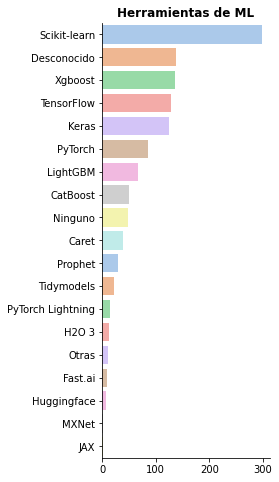

In [36]:
grafica(df_explode,'ml_tools','Herramientas de ML',lista)

La herramienta más empleada de Machine Learning es Scikit-learn, por lo que Adalab incluye en su formación la herramienta con más relevancia actualmente en el mercado. Por si acaso, debería estar pendiente de la tendencia de otras herramientas como Xgboost o TensorFlow, por si empezaran a cobrar más importancia en el futuro. **!!!**

### Notebooks

In [37]:
saber_unicos(df_explode,'notebooks')

Index(['unknown', 'Kaggle Notebooks', 'Colab Notebooks', 'Binder / JupyterHub',
       'Google Cloud Datalab', 'IBM Watson Studio', 'Google Cloud Notebooks',
       'Azure Notebooks', 'Other', 'Amazon Sagemaker Studio Notebooks',
       'Databricks Collaborative Notebooks', 'Zeppelin / Zepl Notebooks',
       'Observable Notebooks', 'Amazon EMR Notebooks', 'Paperspace / Gradient',
       'Deepnote Notebooks', 'Code Ocean'],
      dtype='object', name='notebooks')

In [38]:
lista =['Desconocido', 'Kaggle Notebooks', 'Colab Notebooks', 'Binder / JupyterHub',
       'Google Cloud Datalab', 'IBM Watson Studio', 'Google Cloud Notebooks',
       'Azure Notebooks', 'Otros', 'Amazon Sagemaker Studio Notebooks',
       'Databricks Collaborative Notebooks', 'Zeppelin / Zepl Notebooks',
       'Observable Notebooks', 'Amazon EMR Notebooks', 'Paperspace / Gradient',
       'Deepnote Notebooks', 'Code Ocean']

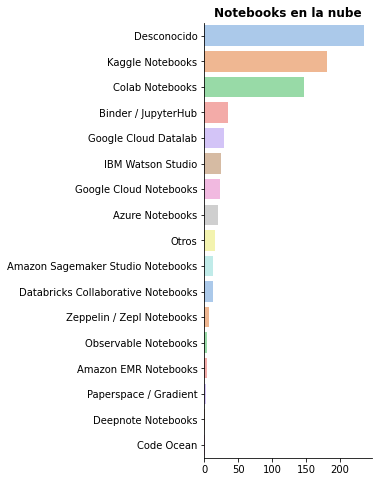

In [39]:
grafica(df_explode,'notebooks','Notebooks en la nube',lista)

Hay una mayoría de personas que no ha respondido a esta pregunta. No obstante, se puede concluir que, por lo general, Kaggle Notebooks y Google Colab son las favoritas en el sector. Se menciona brevemente Colab, pero quizá deberían hacer más hincapié en este tipo de notebooks de manera general.

### Cursos

In [40]:
saber_unicos(df_explode,'courses')

Index(['Kaggle Learn Courses', 'Coursera', 'Udemy', 'DataCamp', 'unknown',
       'University Courses', 'edX', 'Other', 'LinkedIn Learning', 'Udacity',
       'Cloud-certification programs', 'Fast.ai'],
      dtype='object', name='courses')

In [41]:
lista =['Kaggle Learn Courses', 'Coursera', 'Udemy', 'DataCamp', 'Desconocido',
       'University Courses', 'edX', 'Otras', 'LinkedIn Learning', 'Udacity',
       'Cloud-certification programs', 'Fast.ai']

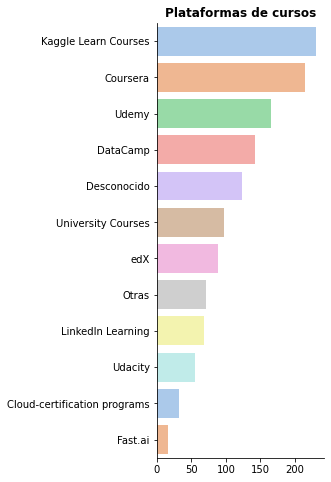

In [42]:
grafica(df_explode,'courses','Plataformas de cursos',lista)

En esta gráfica no aparece Platzi, que es la plataforma empleada por Adalab para realizar el módulo 0. Quizá sería conveniente considerar Kaggle Learn o Coursera pero, sobre todo, Udemy, ya que tiene mucha relevancia en este sector. 

### Herramientas BI

In [43]:
saber_unicos(df_explode, 'bi')

Index(['unknown', 'Microsoft Power BI', 'Tableau', 'None',
       'Google Data Studio', 'Qlik', 'Other', 'Tableau CRM', 'Alteryx',
       'Salesforce', 'SAP Analytics Cloud', 'Looker', 'Amazon QuickSight',
       'TIBCO Spotfire', 'Microsoft Azure Synapse', 'Sisense', 'Thoughtspot'],
      dtype='object', name='bi')

In [44]:
lista = ['Desconocido', 'Microsoft Power BI', 'Tableau', 'Ninguno',
       'Google Data Studio', 'Qlik', 'Otros', 'Tableau CRM', 'Alteryx',
       'Salesforce', 'SAP Analytics Cloud', 'Looker', 'Amazon QuickSight',
       'TIBCO Spotfire', 'Microsoft Azure Synapse', 'Sisense', 'Thoughtspot']

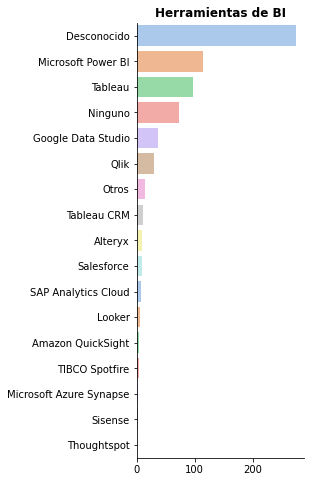

In [45]:
grafica(df_explode,'bi','Herramientas de BI', lista)

Aunque es cierto que la herramienta de Power BI es la más utilizada, tiene sentido que Adalab enseñe Tableu en su formación, ya que Power BI solamente puede ser utilizada por ordenadores con una sistema Windows, mientras que Tableu no tiene esa limitación y es más genérico. Además, Tableu sigue siendo una herramienta muy popular en el sector. **!!!**

### Algoritmos de ML

In [46]:
saber_unicos(df_explode, 'ml_algorithm')

Index(['Linear or Logistic Regression', 'Decision Trees or Random Forests',
       'Gradient Boosting Machines', 'unknown', 'Bayesian Approaches',
       'Convolutional Neural Networks', 'Dense Neural Networks',
       'Recurrent Neural Networks', 'None', 'Transformer Networks',
       'Evolutionary Approaches', 'Generative Adversarial Networks', 'Other'],
      dtype='object', name='ml_algorithm')

In [47]:
lista = ['Linear o Logistic Regression', 'Decision Trees o Random Forests',
       'Gradient Boosting Machines', 'Desconocido', 'Bayesian Approaches',
       'Convolutional Neural Networks', 'Dense Neural Networks',
       'Recurrent Neural Networks', 'Ninguno', 'Transformer Networks',
       'Evolutionary Approaches', 'Generative Adversarial Networks', 'Otros']

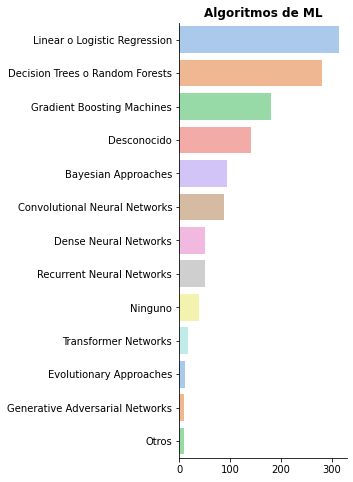

In [48]:
grafica(df_explode,'ml_algorithm','Algoritmos de ML', lista)

Los algoritmos de ML más empleados son Linear o Logistic Regression y Decision Trees o Random Forests, lo cual corresponde a lo que enseña Adalab durante su bootcamp, por lo que está actualizada en este sentido.

### Social Media

In [49]:
saber_unicos(df_explode, 'media')

Index(['Kaggle', 'YouTube', 'Blogs', 'unknown', 'Reddit', 'Email newsletters',
       'Twitter', 'Course Forums', 'Slack Communities', 'Podcasts',
       'Journal Publications', 'Other'],
      dtype='object', name='media')

In [50]:
lista = ['Kaggle', 'YouTube', 'Blogs', 'Desconocido', 'Reddit', 'Email newsletters',
       'Twitter', 'Foros de cursos', 'Comunidades de Slack', 'Podcasts',
       'Publicaciones científicas', 'Otros']

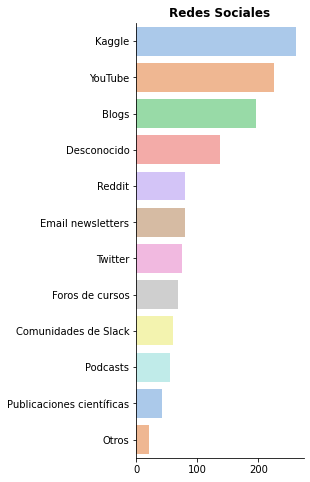

In [51]:
grafica(df_explode,'media','Redes Sociales', lista)

Los lugares más conmuménte empleados para mantenerse al día de las actualizaciones del secotr son Kaggle, Youtube y blogs. Esto podría ser empleado Adalab para centrar sus estrategias de marketing en estas redes sociales. Así, las personas que ya se encuentran dentro del sector podrían recomendar este bootcamp a personas que quieren realizar esa reinvención laboral. 

### Sharing Platforms

In [52]:
saber_unicos(df_explode, 'sharing')

Index(['unknown', 'I do not share my work publicly', 'GitHub', 'Kaggle',
       'Colab', 'Personal blog', 'Streamlit', 'Plotly Dash', 'Shiny', 'Other',
       'NBViewer'],
      dtype='object', name='sharing')

In [53]:
lista = ['Desconocido', 'No hago mi trabajo público', 'GitHub', 'Kaggle',
        'Colab', 'Personal blog', 'Streamlit', 'Plotly Dash', 'Shiny', 'Otros',
       'NBViewer']


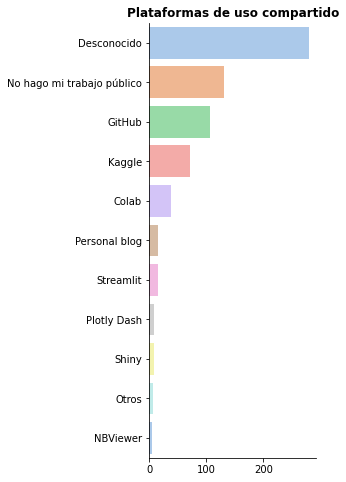

In [54]:
grafica(df_explode,'sharing','Plataformas de uso compartido', lista)

Muchas personas no comparten su trabajo de manera pública, pero aquellas que sí lo hacen lo realizan en Github y Kaggle. GitHub sí es enseñada en Adalab, aunque no Kaggle, por lo que sería interesante mostrar también estas herramienta.

## Personas por industria y tamaño de la empresa

In [55]:
df.head(1)

,id_survey,time,age,gender,country,studies,position,years_programming,preferred_language,computing_platform,times_use_tpu,years_use_ml,industry,company_size,da_employees,company_ml,year_salary,investment_ml,main_bd,main_bi,main_da,duties,best_cloud_services,regular_automl_a,data_storage_products_b
16,16,1315,50-54,Man,Belgium,Bachelor’s degree,Data Analyst,Architect,Python,A laptop,Never,1-2,Energy/Mining,Large,5-9,Exploring,"2,000-2,999",0,unknown,unknown,Local development environments,Analyze and understand data to influence produ...,unknown,unknown,unknown


In [56]:
df["industry"].value_counts()

industry
Accounting/Finance                        106
Computers/Technology                       48
Academics/Education                        44
Retail/Sales                               42
Government/Public Service                  38
Manufacturing/Fabrication                  34
Other                                      29
Marketing/CRM                              29
Shipping/Transportation                    25
Energy/Mining                              24
Medical/Pharmaceutical                     23
Online Service/Internet-based Services     22
Broadcasting/Communications                21
unknown                                    19
Online Business/Internet-based Sales       18
Insurance/Risk Assessment                  15
Hospitality/Entertainment/Sports           11
Non-profit/Service                          6
Military/Security/Defense                   3
Name: count, dtype: int64

In [57]:
lista_industria = ["Accounting/Finance", "Computers/Technology", "Academics/Education", "Retail/Sales",
                    "Government/Public Service", "Manufacturing/Fabrication", "Other", "Marketing/CRM",
                    "Shipping/Transportation", "Energy/Mining", "Medical/Pharmaceutical", "Online Service/Internet-based Services",
                    "Broadcasting/Communications", "unknown", "Online Business/Internet-based Sales",
                    "Insurance/Risk Assessment", "Hospitality/Entertainment/Sports", "Non-profit/Service", "Military/Security/Defense"]

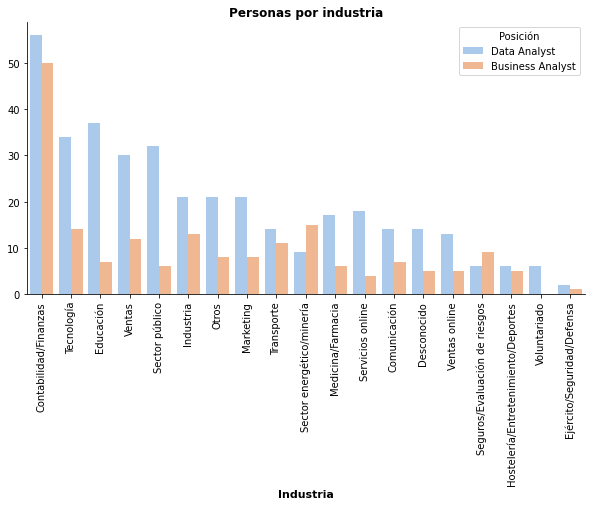

In [58]:
plt.figure(figsize= (10,5))
fig = sns.countplot(x='industry',hue='position', data=df, order=lista_industria,palette='pastel')
fig.set_xlabel('Industria', fontweight = "bold", fontsize = 11)
fig.set_ylabel('', fontweight = "bold", fontsize = 11)

fig.set_title('Personas por industria', fontweight = "bold", fontsize = 12)
plt.legend(title='Posición')
fig.set_xticklabels( ['Contabilidad/Finanzas', 'Tecnología',
       'Educación', 'Ventas', 'Sector público',
       'Industria', 'Otros',
       'Marketing', 'Transporte', 'Sector energético/minería', 'Medicina/Farmacia',
       'Servicios online', 'Comunicación',
       'Desconocido', 'Ventas online', 'Seguros/Evaluación de riesgos', 'Hostelería/Entretenimiento/Deportes',
       'Voluntariado', 'Ejército/Seguridad/Defensa'])

plt.xticks(rotation = 90)

fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False);

En esta gráfica, se puede ver que las posiciones de *Data Analyst* y  *Business Analyst* se concentran, sobre todo, en los sectores de Contabilidad/Finanzas y Tecnología, por lo que es interesante tenerlo en cuenta a la hora de captar mentores en estos sectores, ya que tendrán más contactos para que las alumnas puedan hacer *networking*. 

In [59]:
df["company_size"].value_counts()

company_size
Startup    134
Macro      133
Large      117
Medium      77
Small       75
unknown     21
Name: count, dtype: int64

In [60]:
lista_tamaño = ["Startup", "Macro", "Large", "Medium", "Small", "unknown"]

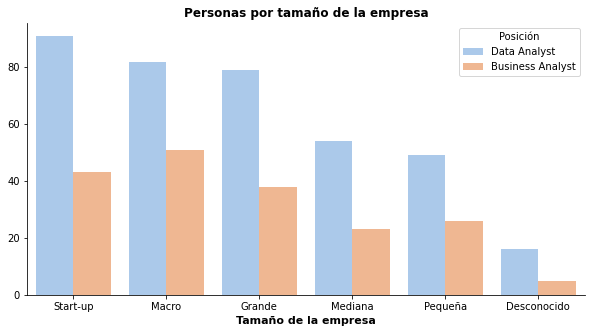

In [69]:
plt.figure(figsize= (10,5))
fig = sns.countplot(x='company_size',hue='position', data=df, order=lista_tamaño,palette='pastel')
fig.set_xlabel('Tamaño de la empresa', fontweight = "bold", fontsize = 11)
fig.set_ylabel('', fontweight = "bold", fontsize = 11)

fig.set_title('Personas por tamaño de la empresa', fontweight = "bold", fontsize = 12)
plt.legend(title='Posición')
fig.set_xticklabels(["Start-up", "Macro", "Grande", "Mediana", "Pequeña", "Desconocido"])
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False);

Las start-ups son las empresas donde más trabajan estas posiciones, seguido de las macro empresas y las grandes empresas. Las macro y grandes empresas son las que tienen la capacidad de invertir en este tipo de servicios para poder mejorar su negocio y tienen equipos más grandes, mientras que las start-up son aquellas que entran en el sector y necesitan personas que estén cualificadas para estos puestos. 

# Inversión en ML

In [62]:
df.head(1)

,id_survey,time,age,gender,country,studies,position,years_programming,preferred_language,computing_platform,times_use_tpu,years_use_ml,industry,company_size,da_employees,company_ml,year_salary,investment_ml,main_bd,main_bi,main_da,duties,best_cloud_services,regular_automl_a,data_storage_products_b
16,16,1315,50-54,Man,Belgium,Bachelor’s degree,Data Analyst,Architect,Python,A laptop,Never,1-2,Energy/Mining,Large,5-9,Exploring,"2,000-2,999",0,unknown,unknown,Local development environments,Analyze and understand data to influence produ...,unknown,unknown,unknown


In [66]:
df["investment_ml"].value_counts()

investment_ml
0                  246
100-999             71
1000-9,999          67
unknown             63
1-99                46
100,000 or more     32
10,000-99,999       32
Name: count, dtype: int64

In [71]:
lista_inversion_ml =[ "0", "1-99", "100-999", "1000-9,999", "10,000-99,999", "100,000 or more", "unknown"]

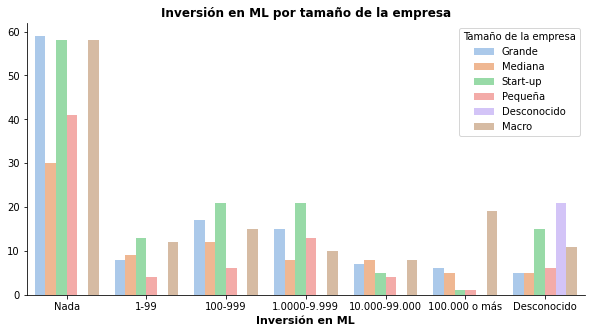

In [76]:
plt.figure(figsize= (10,5))
fig = sns.countplot(x='investment_ml',hue='company_size', data= df, order = lista_inversion_ml,palette='pastel')
fig.set_xlabel('Inversión en ML', fontweight = "bold", fontsize = 11)
fig.set_ylabel('', fontweight = "bold", fontsize = 11)

fig.set_title('Inversión en ML por tamaño de la empresa', fontweight = "bold", fontsize = 12)
plt.legend(title='Tamaño de la empresa', labels = ["Grande", "Mediana", "Start-up", "Pequeña", "Desconocido", "Macro"])
fig.set_xticklabels(["Nada", "1-99", "100-999", "1.0000-9.999", "10.000-99.000", "100.000 o más", "Desconocido"])
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False);

Se puede observar que la mayoría de las empresas, por lo general, no están invirtiendo en *Machine Learning*, independientemente del tamaño de la empresa. No obstante, también se puede ver que las start-up destacan en las inversiones de menor cantidad, pero las empresas que más invierten en *ML* son las macro empresas que pueden permitírselo. Esto tiene lógica, ya que no todas las empresas tienen la capacidad de realizar grandes inversiones en ello. Parece que sí que hay una tendencia a invertir en Machine Learning, por lo cual el hecho de que Adalab enseñe a sus alumnas estos procesos es altamente positivo para su futuro. **!!!**
